# Hospital Readmissions Data Analysis and Recommendations for Reduction

### Background
In October 2012, the US government's Center for Medicare and Medicaid Services (CMS) began reducing Medicare payments for Inpatient Prospective Payment System hospitals with excess readmissions. Excess readmissions are measured by a ratio, by dividing a hospital’s number of “predicted” 30-day readmissions for heart attack, heart failure, and pneumonia by the number that would be “expected,” based on an average hospital with similar patients. A ratio greater than 1 indicates excess readmissions.

### Exercise Directions

In this exercise, you will:
+ critique a preliminary analysis of readmissions data and recommendations (provided below) for reducing the readmissions rate
+ construct a statistically sound analysis and make recommendations of your own 

More instructions provided below. Include your work **in this notebook and submit to your Github account**. 

### Resources
+ Data source: https://data.medicare.gov/Hospital-Compare/Hospital-Readmission-Reduction/9n3s-kdb3
+ More information: http://www.cms.gov/Medicare/medicare-fee-for-service-payment/acuteinpatientPPS/readmissions-reduction-program.html
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

In [65]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import bokeh.plotting as bkp
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [66]:
# read in readmissions data provided
hospital_read_df = pd.read_csv('data/cms_hospital_readmissions.csv')

In [67]:
hospital_read_df.head()

,Hospital Name,Provider Number,State,Measure Name,Number of Discharges,Footnote,Excess Readmission Ratio,Predicted Readmission Rate,Expected Readmission Rate,Number of Readmissions,Start Date,End Date
0,FROEDTERT MEMORIAL LUTHERAN HOSPITAL,520177,WI,READM-30-HIP-KNEE-HRRP,242,NaN,1.9095,10.8,5.6,38.0,07/01/2010,06/30/2013
1,PROVIDENCE HOSPITAL,90006,DC,READM-30-HIP-KNEE-HRRP,247,NaN,1.7521,9.2,5.3,33.0,07/01/2010,06/30/2013
2,BEAUFORT COUNTY MEMORIAL HOSPITAL,420067,SC,READM-30-HIP-KNEE-HRRP,586,NaN,1.5836,7.6,4.8,53.0,07/01/2010,06/30/2013
3,ADVOCATE CHRIST HOSPITAL & MEDICAL CENTER,140208,IL,READM-30-HIP-KNEE-HRRP,965,NaN,1.5760,9.0,5.7,95.0,07/01/2010,06/30/2013
4,BRAZOSPORT REGIONAL HEALTH SYSTEM,450072,TX,READM-30-HIP-KNEE-HRRP,149,NaN,1.5308,8.2,5.4,20.0,07/01/2010,06/30/2013


In [68]:
hospital_read_df.shape

(16860, 12)

In [69]:
clean_hospital_read_df.shape

(11578, 12)

****
## Preliminary Analysis

In [70]:
# deal with missing and inconvenient portions of data 
clean_hospital_read_df = hospital_read_df[hospital_read_df['Number of Discharges'] != 'Not Available']
clean_hospital_read_df.loc[:, 'Number of Discharges'] = clean_hospital_read_df['Number of Discharges'].astype(int)
clean_hospital_read_df = clean_hospital_read_df.sort_values('Number of Discharges')

/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:537: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


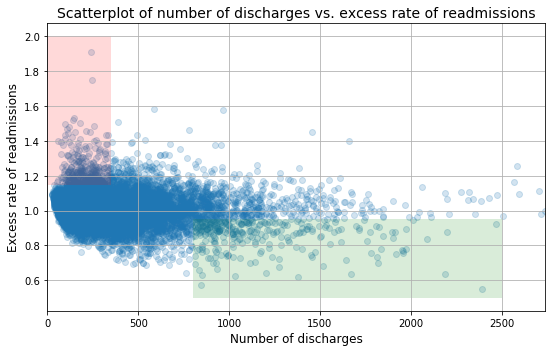

In [71]:
# generate a scatterplot for number of discharges vs. excess rate of readmissions
# lists work better with matplotlib scatterplot function
x = [a for a in clean_hospital_read_df['Number of Discharges'][81:-3]]
y = list(clean_hospital_read_df['Excess Readmission Ratio'][81:-3])

fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(x, y,alpha=0.2)

ax.fill_between([0,350], 1.15, 2, facecolor='red', alpha = .15, interpolate=True)
ax.fill_between([800,2500], .5, .95, facecolor='green', alpha = .15, interpolate=True)

ax.set_xlim([0, max(x)])
ax.set_xlabel('Number of discharges', fontsize=12)
ax.set_ylabel('Excess rate of readmissions', fontsize=12)
ax.set_title('Scatterplot of number of discharges vs. excess rate of readmissions', fontsize=14)

ax.grid(True)
fig.tight_layout()

****

## Preliminary Report

Read the following results/report. While you are reading it, think about if the conclusions are correct, incorrect, misleading or unfounded. Think about what you would change or what additional analyses you would perform.

**A. Initial observations based on the plot above**
+ Overall, rate of readmissions is trending down with increasing number of discharges
+ With lower number of discharges, there is a greater incidence of excess rate of readmissions (area shaded red)
+ With higher number of discharges, there is a greater incidence of lower rates of readmissions (area shaded green) 

**B. Statistics**
+ In hospitals/facilities with number of discharges < 100, mean excess readmission rate is 1.023 and 63% have excess readmission rate greater than 1 
+ In hospitals/facilities with number of discharges > 1000, mean excess readmission rate is 0.978 and 44% have excess readmission rate greater than 1 

**C. Conclusions**
+ There is a significant correlation between hospital capacity (number of discharges) and readmission rates. 
+ Smaller hospitals/facilities may be lacking necessary resources to ensure quality care and prevent complications that lead to readmissions.

**D. Regulatory policy recommendations**
+ Hospitals/facilties with small capacity (< 300) should be required to demonstrate upgraded resource allocation for quality care to continue operation.
+ Directives and incentives should be provided for consolidation of hospitals and facilities to have a smaller number of them with higher capacity and number of discharges.

****
### Exercise

Include your work on the following **in this notebook and submit to your Github account**. 

A. Do you agree with the above analysis and recommendations? Why or why not?
   
B. Provide support for your arguments and your own recommendations with a statistically sound analysis:

   1. Setup an appropriate hypothesis test.
   2. Compute and report the observed significance value (or p-value).
   3. Report statistical significance for $\alpha$ = .01. 
   4. Discuss statistical significance and practical significance. Do they differ here? How does this change your recommendation to the client?
   5. Look at the scatterplot above. 
      - What are the advantages and disadvantages of using this plot to convey information?
      - Construct another plot that conveys the same information in a more direct manner.



You can compose in notebook cells using Markdown: 
+ In the control panel at the top, choose Cell > Cell Type > Markdown
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

# Critique of Analysis

The observation that the overall rate of readmissions is trending down is suspect. We can analyze this claim by computing the slope and significance of a linear regression line. The mean excess readmission rates for number of discharges<100 and number of discharges>1000 are both very close to one. We can determine the significance of their difference. Also, it's unclear what the hospitals/facilities with small capacity(<300) means. Is <300 the number of discharges? If so, why the change from 100 to 300? Before undertaking our analysis, let's examine the data.

## Examine Data

In [185]:
clean_hospital_read_df.head()

,Hospital Name,Provider Number,State,Measure Name,Number of Discharges,Footnote,Excess Readmission Ratio,Predicted Readmission Rate,Expected Readmission Rate,Number of Readmissions,Start Date,End Date
16857,THREE RIVERS MEDICAL CENTER,180128,KY,READM-30-HIP-KNEE-HRRP,0,7.0,NaN,NaN,NaN,NaN,07/01/2010,06/30/2013
14582,SELLS INDIAN HEALTH SERVICE HOSPITAL,30074,AZ,READM-30-COPD-HRRP,0,7.0,NaN,NaN,NaN,NaN,07/01/2010,06/30/2013
15606,PHS INDIAN HOSPITAL AT PINE RIDGE,430081,SD,READM-30-AMI-HRRP,0,7.0,NaN,NaN,NaN,NaN,07/01/2010,06/30/2013
15615,FLORIDA STATE HOSPITAL UNIT 31 MED,100298,FL,READM-30-COPD-HRRP,0,7.0,NaN,NaN,NaN,NaN,07/01/2010,06/30/2013
14551,GREENE COUNTY HOSPITAL,10051,AL,READM-30-AMI-HRRP,0,7.0,NaN,NaN,NaN,NaN,07/01/2010,06/30/2013


In [186]:
clean_hospital_read_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11578 entries, 16857 to 13666
Data columns (total 12 columns):
Hospital Name                 11578 non-null object
Provider Number               11578 non-null int64
State                         11578 non-null object
Measure Name                  11578 non-null object
Number of Discharges          11578 non-null int64
Footnote                      81 non-null float64
Excess Readmission Ratio      11497 non-null float64
Predicted Readmission Rate    11497 non-null float64
Expected Readmission Rate     11497 non-null float64
Number of Readmissions        11497 non-null float64
Start Date                    11578 non-null object
End Date                      11578 non-null object
dtypes: float64(5), int64(2), object(5)
memory usage: 1.5+ MB


There are more rows than non-null objects. Let's clean the data.

## Clean Data

In [99]:
df = clean_hospital_read_df

#We are only working with two columns
df = df[pd.to_numeric(df['Number of Discharges'], errors='coerce').notnull()]
df = df[pd.to_numeric(df['Excess Readmission Ratio'], errors='coerce').notnull()]

In [100]:
df.head()

,Hospital Name,Provider Number,State,Measure Name,Number of Discharges,Footnote,Excess Readmission Ratio,Predicted Readmission Rate,Expected Readmission Rate,Number of Readmissions,Start Date,End Date
1832,UNIVERSITY OF MD CHARLES REGIONAL MEDICAL CENTER,210035,MD,READM-30-AMI-HRRP,25,NaN,1.0914,26.8,24.6,12.0,07/01/2010,06/30/2013
1699,ATLANTIC GENERAL HOSPITAL,210061,MD,READM-30-AMI-HRRP,27,NaN,1.0961,24.8,22.6,12.0,07/01/2010,06/30/2013
1774,MERCY MEDICAL CENTER INC,210008,MD,READM-30-AMI-HRRP,28,NaN,1.0934,24.4,22.3,12.0,07/01/2010,06/30/2013
1853,KAISER FOUNDATION HOSPITAL-SANTA CLARA,50071,CA,READM-30-HF-HRRP,29,NaN,1.0908,21.0,19.3,11.0,07/01/2010,06/30/2013
1290,PALMERTON HOSPITAL,390019,PA,READM-30-AMI-HRRP,30,NaN,1.1123,23.2,20.9,13.0,07/01/2010,06/30/2013


In [187]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11497 entries, 1832 to 13666
Data columns (total 13 columns):
Hospital Name                 11497 non-null object
Provider Number               11497 non-null int64
State                         11497 non-null object
Measure Name                  11497 non-null object
Number of Discharges          11497 non-null int64
Footnote                      0 non-null float64
Excess Readmission Ratio      11497 non-null float64
Predicted Readmission Rate    11497 non-null float64
Expected Readmission Rate     11497 non-null float64
Number of Readmissions        11497 non-null float64
Start Date                    11497 non-null object
End Date                      11497 non-null object
label                         11497 non-null object
dtypes: float64(5), int64(2), object(6)
memory usage: 1.5+ MB


This looks much better.

## Graph Data

While fairly attractive, the graph above leaves something to be desired. Also, the lists provided for x and y be be written with much simpler code. In addition to providing a basic scatter plot, superimposing a linear regression line is warranted.

slope = -2.901051733057071e-05 Excess Readmission Ratio / Number of Discharges
intercept = 1.0181061473733573 Excess Readmission Ratio


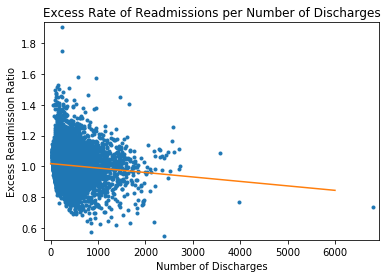

In [189]:
# Define function for linear regression
def lin_reg(x,y):
    
    # Make sure all values are finite
    idx = np.isfinite(x) & np.isfinite(y)

    # Perform a linear regression
    a, b = np.polyfit(x[idx], y[idx], 1)
    
    return a, b

# generate a scatterplot for number of discharges vs. excess rate of readmissions
x = df['Number of Discharges']
y = df['Excess Readmission Ratio']

_ = plt.plot(x, y, marker='.', linestyle='none')
plt.margins(0.02)
_ = plt.xlabel('Number of Discharges')
_ = plt.ylabel('Excess Readmission Ratio')
_ = plt.title('Excess Rate of Readmissions per Number of Discharges')

# Call linear regression funcion
a, b = lin_reg(x,y)

# Print the results to the screen
print('slope =', a, 'Excess Readmission Ratio / Number of Discharges')
print('intercept =', b, 'Excess Readmission Ratio')

# Make theoretical line to plot
x2 = np.array([0,6000])
y2 = a * x2 + b

# Add regression line to your plot
_ = plt.plot(x2, y2)

# Draw the plot
plt.show()

The scatter plot itself does not suggest a linear relationship. The linear regression line is very close to horizontal. We can confirm its value and determine its signifcance using linregress.

## Correlation Coeffecient / Significance

In [120]:
from scipy.stats import linregress
linregress(x, y)

LinregressResult(slope=-2.90105173305707e-05, intercept=1.018106147373357, rvalue=-0.09739794351079352, pvalue=1.2225473776734486e-25, stderr=2.764912734911059e-06)

The correlation coefficient is given as -0.097. It's not very large, however it's very significant with a p-value of 1.22e-25!

## Number of Discharges: Subgroups

Let's check the claims about the means of Excess Readmission Ratios and percentages of Excess Readmission Ratios greater than 1. First, we need to split the data into subgroups.

### Number of Discharges<100

In [198]:
# Create DataFrame where Number of Discharges is less than 100
df_100 = df[df['Number of Discharges']<100]

In [199]:
# See how many facilities have Number of Discharges less than 100
df_100.shape

(1188, 13)

In [210]:
# Compute mean and median
mean_100 = df_100['Excess Readmission Ratio'].mean()
median_100 = df_100['Excess Readmission Ratio'].median()
print("Mean:", mean_100)
print("Median:", median_100)

Mean: 1.0226183501683506
Median: 1.01775


In [203]:
# Compute Percentages of Excess Readmission Ratios Greater Than 1
df_100[df_100['Excess Readmission Ratio']>1].count()/df_100.shape[0]

Hospital Name                 0.632155
Provider Number               0.632155
State                         0.632155
Measure Name                  0.632155
Number of Discharges          0.632155
Footnote                      0.000000
Excess Readmission Ratio      0.632155
Predicted Readmission Rate    0.632155
Expected Readmission Rate     0.632155
Number of Readmissions        0.632155
Start Date                    0.632155
End Date                      0.632155
label                         0.632155
dtype: float64

### Number of Discharges>1000

In [92]:
# Create DataFrame where Number of Discharges is greater than 1000
df_1000 = df[df['Number of Discharges']>1000]

In [204]:
# See how many facilities have Number of Discharges greater than 1000
df_1000.shape

(463, 12)

In [211]:
# Compute mean and median
mean_1000 = df_1000['Excess Readmission Ratio'].mean()
median_1000 = df_1000['Excess Readmission Ratio'].median()
print("Mean:", mean_1000)
print("Median:", median_1000)

Mean: 0.9783354211663071
Median: 0.9864


In [205]:
# Compute Percentages of Excess Readmission Ratios Greater Than 1
df_1000[df_1000['Excess Readmission Ratio']>1].count()/df_1000.shape[0]

Hospital Name                 0.444924
Provider Number               0.444924
State                         0.444924
Measure Name                  0.444924
Number of Discharges          0.444924
Footnote                      0.000000
Excess Readmission Ratio      0.444924
Predicted Readmission Rate    0.444924
Expected Readmission Rate     0.444924
Number of Readmissions        0.444924
Start Date                    0.444924
End Date                      0.444924
dtype: float64

### Number of Discharges<300

In [94]:
# Create DataFrame where Number of Discharges is less than 300
df_300 = df[df['Number of Discharges']<300]

In [207]:
# See how many facilities have Number of Discharges less than 300
df_300.shape

(6189, 12)

In [212]:
# Compute mean and median
mean_300 = df_300['Excess Readmission Ratio'].mean()
median_300 = df_300['Excess Readmission Ratio'].median()
print("Mean:", mean_300)
print("Median:", median_300)

Mean: 1.0142382121807445
Median: 1.00685


In [208]:
# Compute Percentages of Excess Readmission Ratios Greater Than 1
df_300[df_300['Excess Readmission Ratio']>1].count()/df_300.shape[0]

Hospital Name                 0.530457
Provider Number               0.530457
State                         0.530457
Measure Name                  0.530457
Number of Discharges          0.530457
Footnote                      0.000000
Excess Readmission Ratio      0.530457
Predicted Readmission Rate    0.530457
Expected Readmission Rate     0.530457
Number of Readmissions        0.530457
Start Date                    0.530457
End Date                      0.530457
dtype: float64

The numbers displayed in the preliminary report appear to be correct. Notably, facilities with the total number of discharges less than 300 are very close to a mean and median of 1.0. We can analyze these groups further by displaying a swarm plot.

## Swarm Plot

In [171]:
# Create new column
df['label'] = "default"

In [182]:
# Label the column depending on number of discharges.
df.loc[df['Number of Discharges'] < 100, 'label'] = "<100"
df.loc[(df['Number of Discharges'] >= 100) & (df['Number of Discharges'] < 300), 'label'] = "100-300"
df.loc[(df['Number of Discharges'] >= 300) & (df['Number of Discharges'] < 1000), 'label'] = "300-1000"
df.loc[df['Number of Discharges'] >= 1000, 'label'] = ">1000"

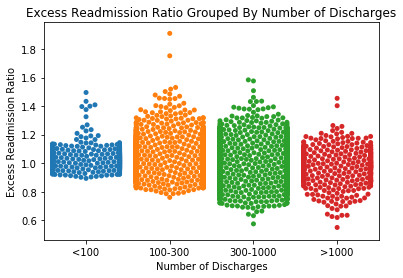

In [183]:
# Create Swarm Plot
import seaborn as sns
_ = sns.swarmplot(x='label', y='Excess Readmission Ratio', data=df)
_ = plt.xlabel('Number of Discharges')
_ = plt.title('Excess Readmission Ratio Grouped By Number of Discharges')


It does appear from the swarm plot that there is a slight trend downward based on grouping by Number of Discharges. We know this is true from the correlation coeffecient significance test that provided a probability of 1.22e-25. However, the swarm plot also indicates that the majority of Excess Readmission Ratios are very close to 1 for all groups. 

## Significance Test

Null Hypothesis: The Excess Readmission Ratio is 1.0 for all groups.
Alternative Hypothesis: The Excess Readmission Ratio is not 1.0.
    
In order to test the hypothesis for facilities with Number of Discharges < 100, we can employ a bootstrap test by taking 1,000 replicants of 1188 members from the original sample. 

### Bootstrap Functions

In [222]:
#Returns the result of a function, like np.mean(), for a replicate
def bootstrap_replicate_1d(data, func):
    return func(np.random.choice(data, size=1138)

#Calls above function to produce results of desired function, like np.mean(), for all replicants
def draw_bs_reps(data, func, size=1):
    """Draw bootstrap replicates."""

    # Initialize array of replicates: bs_replicates
    bs_replicates = np.empty(size)

    # Generate replicates
    for i in range(size):
        bs_replicates[i] = bootstrap_replicate_1d(data, func)

    return bs_replicates

### Run Bootstrap Test

In [229]:
bs_replicates = draw_bs_reps(df['Excess Readmission Ratio'], np.mean, size=1000)
results = np.sum(bs_replicates > df_100['Excess Readmission Ratio'].mean())/len(bs_replicates)
print("p-value =", results)

p-value = 0.0


In other words, the probability that facilities with Number of Discharges < 100 have an Excess Readmission Ratio of 1.02 being just due to chance is 0.0. Even though 1.02 is very close to 1.0, the difference is statistically significant. We reject the null hypothesis.

### Confidence Interval

We can also give a confidence interval for the mean at the 99% level from the bootstrap data.

In [238]:
# This is a 95% Confidence Interval
ci = np.percentile(bs_replicates,[0.5, 99.5])
print("We are 99% confident that", ci, "captures the true mean of Excess Readmission Ratio.")

We are 99% confident that [1.00528344 1.00959863] captures the true mean of Excess Readmission Ratio.


In [237]:
# Compute the mean of the data
df['Excess Readmission Ratio'].mean()

1.0075037835957146

As expected, the actual mean falls right in the middle.

## Conclusion

The ultimate question is what a difference of 1.0226 and 1.0075 means for hosiptals and facilities with a small capacity (defined above as the ambiguous < 300). For every 100 discharged patients, an additional 1-2 patients would be readmitted in the smaller hospitals according to this data.

Although theoretically significant, a mean ratio within 1-2% of the overall mean is not enough to take action. Further research is needed to explore outliers and to investigate the work done by small hospitals whose mean Excesss Readmission Ratio falls within the 99% Confidence Interval given above.